### Pseudoo-random number generator(PRNG)

In [10]:
import random
from datetime import datetime
dt = datetime.now()
random.seed(int(dt.strftime('%Y%m%d%H%M%S%f')))
for i in range(5):
    print(random.randint(0, 10), end = '\n')

2
3
3
5
3


### Parallel random number generator

In [43]:
from numpy.random import SeedSequence, default_rng
ss = SeedSequence(12345)
child_seeds = ss.spawn(10)
streams = [default_rng(s) for s in child_seeds]
grandchildren = child_seeds[0].spawn(4)
grand_stream = [default_rng(s) for s in grandchildren]
grand_stream

Generator(PCG64) at 0x7FE9059A7AE0

### Random number generator

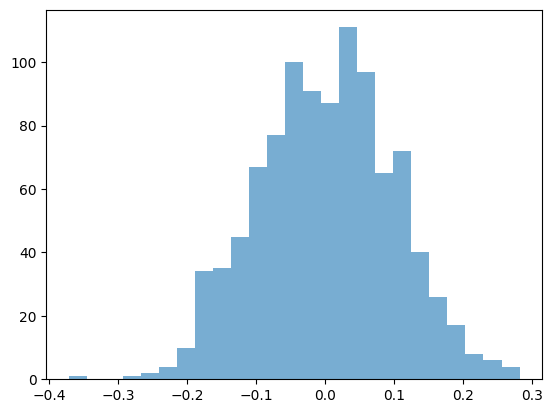

In [60]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma=0, 0.1
s = np.random.normal(mu, sigma, 1000)
plt.hist(s, bins=25, density=False, alpha=0.6)
plt.show()

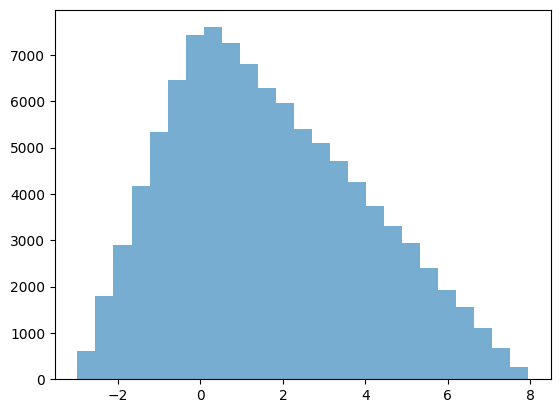

In [45]:
import numpy.random as rnd
s = np.random.triangular(-3, 0, 8, 100000)
plt.hist(s, bins=25, density=False, alpha=0.6)
plt.show()

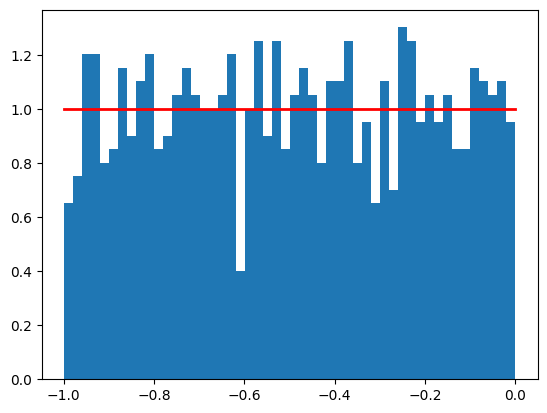

In [61]:
import matplotlib.pyplot as plt
s = np.random.uniform(-1, 0, 1000)
count, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [68]:
import numpy as np
#Function 
def f(x):
    return x*x*x + 6*x - x +17
#Random Points
rn = np.random.uniform(-2,5,10000)
#Point on a curve
xi=[]
for i in rn:
    xi.append(f(i))
    
#Area of each rectangle
Area=[]
for h in xi:
    Area.append(abs(h)*7)
#Average Area of all rectangle units
np.mean(Area)

323.28691155553435

Probability of exceeding the time limit:  0.987 %


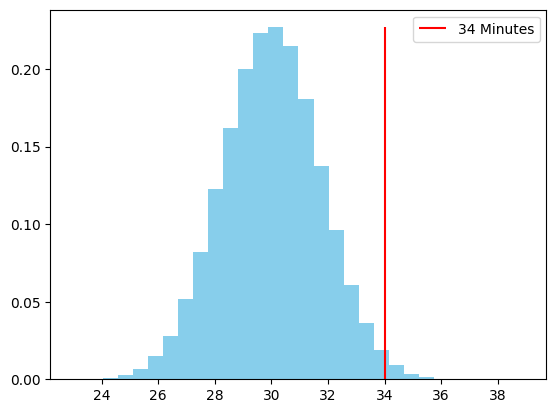

In [92]:
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

def mc_normal(mean, std_dev, samples):
    results = []
    for _ in range(samples):
        results.append(rnd.normal(mean, std_dev))
    return np.array(results)
s = 100000
upper_limit = 34
component_1 = mc_normal(5, 1, s)
component_2 = mc_normal(10, 1, s)
component_3 = mc_normal(15, 1, s)
total = component_1 + component_2 + component_3
probability = np.sum(total > upper_limit)/len(total)*100
print("Probability of exceeding the time limit: ", round(probability, 3), '%')
count, bins, ignored = plt.hist(total, 30, density=True, color='skyblue')
plt.vlines(34, count.min(), count.max(), color='r', label='34 Minutes')
plt.legend()
plt.show()

0.0
1.0
0.0
0.0
0.001
9.999999999999999e-05


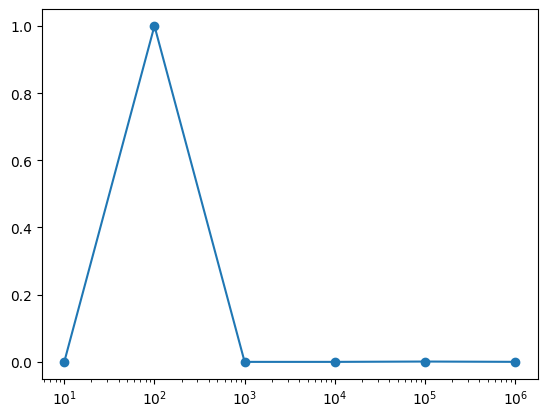

In [96]:
import numpy as np
import copy
import matplotlib.pyplot as plt
org_deck = [
    '1S', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS', 'QS', 'KS',
    '1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'QH', 'KH',
    '1C', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C', 'JC', 'QC', 'KC',
    '1D', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D', 'JD', 'QD', 'KD',
]
def kingking(deck):
    for i in range(len(deck) - 1):
        if deck[i][0] == 'K' and deck[i+1][0] == 'K':
            return True
def MonteCarlo(n):
    count = 0.0
    for i in range(n):
        deck = copy.deepcopy(org_deck)
        np.random.shuffle(deck)
        if kingking(deck):
            count += 1
        print(count/n*100)
        return count/n*100
result = []
for i in range(1,7):
    result.append(MonteCarlo(10**i))
plt.xscale('log')
plt.plot([10**i for i in range(1, 7)], result)
plt.scatter([10**i for i in range(1, 7)], result)